# First Phase Practice Projects - FR

Internship ID - DS2402

Submitted by - Geetanjali Joshi

# Problem No.1

# Red Wine Quality Prediction Project


Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and 
logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there
is no data about grape types, wine brand, wine selling price, etc.).  This dataset can be viewed as classification 
task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent 
or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test
feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
    1 - fixed acidity 
    2 - volatile acidity
    3 - citric acid 
    4 - residual sugar 
    5 - chlorides 
    6 - free sulfur dioxide 
    7 - total sulfur dioxide 
    8 - density 
    9 - pH 
    10 - sulphates 
    11 - alcohol  
    
    Output variable (based on sensory data): 
    12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent 
variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 
'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms 
looking at the ROC curve and the AUC value.
You need to build a classification model. 

In [131]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [132]:
# importing the red wine dataset

wine_data = pd.read_csv("winequality-red.csv")

In [133]:
# show first 10 rows

wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
# shape of the dataset 

wine_data.shape

(1599, 12)

The data set has 1599 rows and 12 columns 

In [7]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The data has no null values 

In [8]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

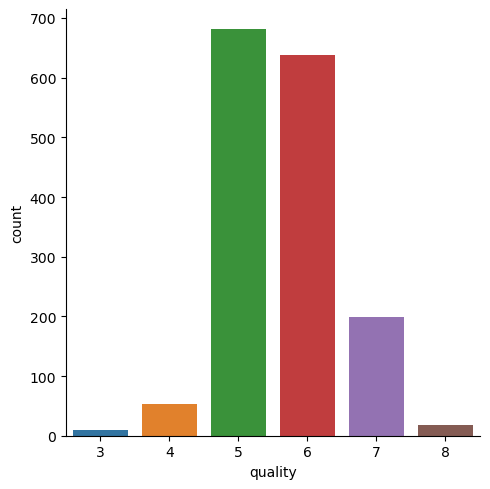

In [9]:
sns.catplot(x = 'quality', data = wine_data, kind = 'count')

In [134]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# following observations can be made out from this data



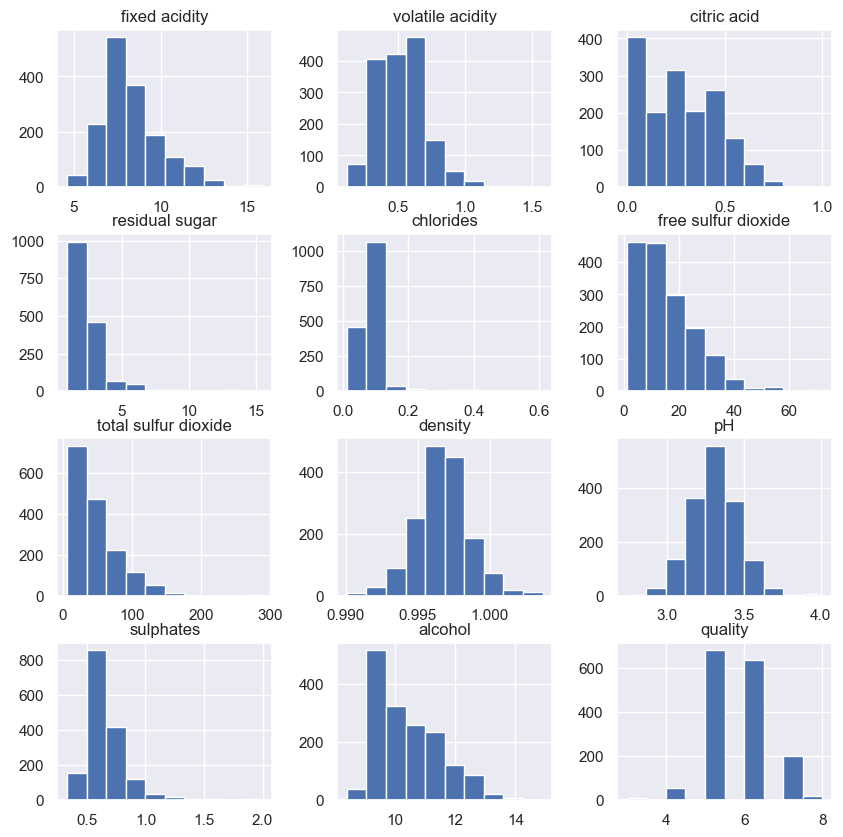

In [135]:
wine_data.hist(bins = 10, figsize = (10,10))
plt.show()

# impact of variables on the quality of wine`

<Axes: xlabel='quality', ylabel='fixed acidity'>

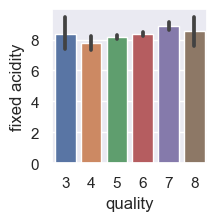

In [136]:
# fixed acidity vs quality

plot = plt.figure(figsize = (2,2))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

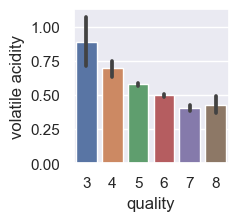

In [137]:
# volatile acidity vs quality

plot = plt.figure(figsize = (2,2))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

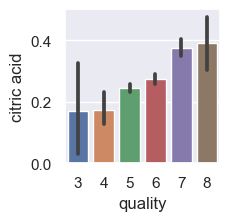

In [138]:
# citric acid vs quality

plot = plt.figure(figsize = (2,2))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

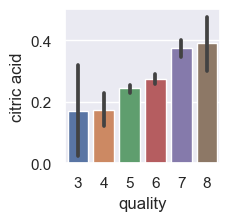

In [139]:
# citric acid vs quality

plot = plt.figure(figsize = (2,2))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

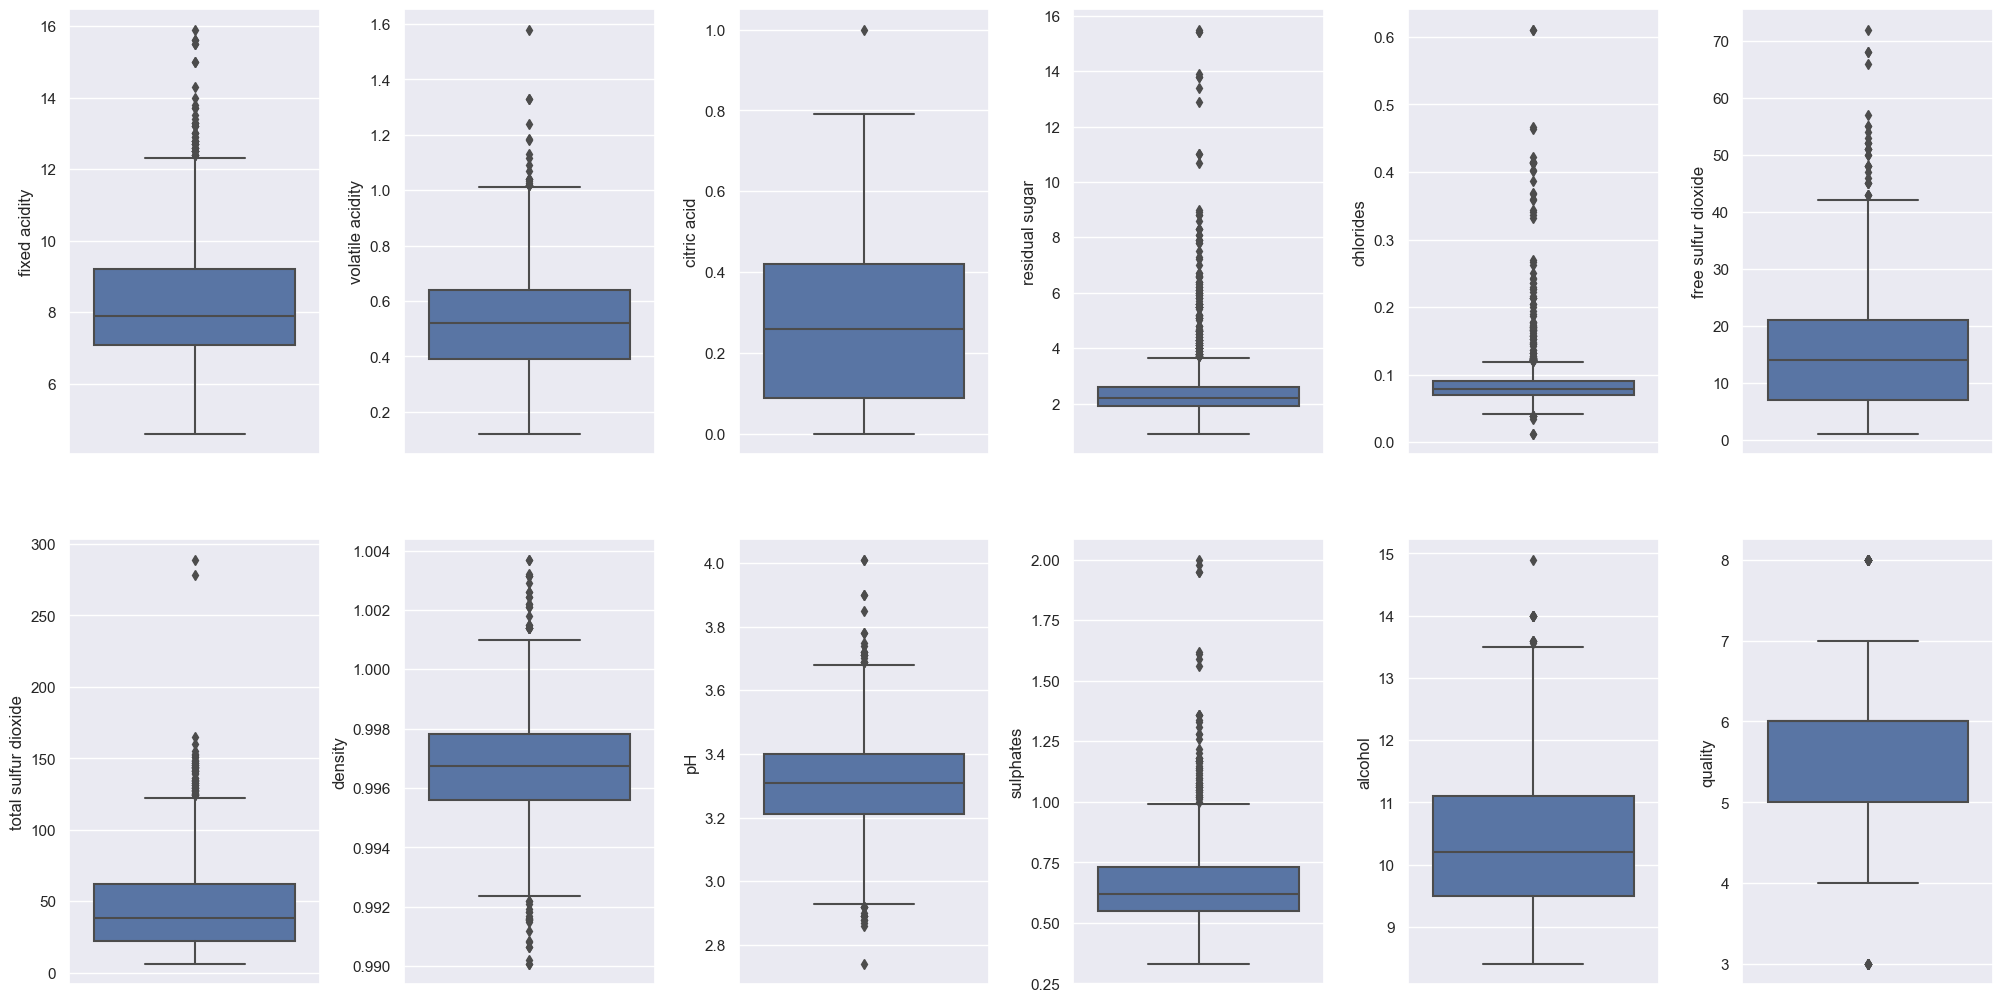

In [140]:
# create box plots to check outliers

fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in wine_data.items():
    if col != 'type':
        sns.boxplot(y=col, data = wine_data, ax = ax[index])
        index +=1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)




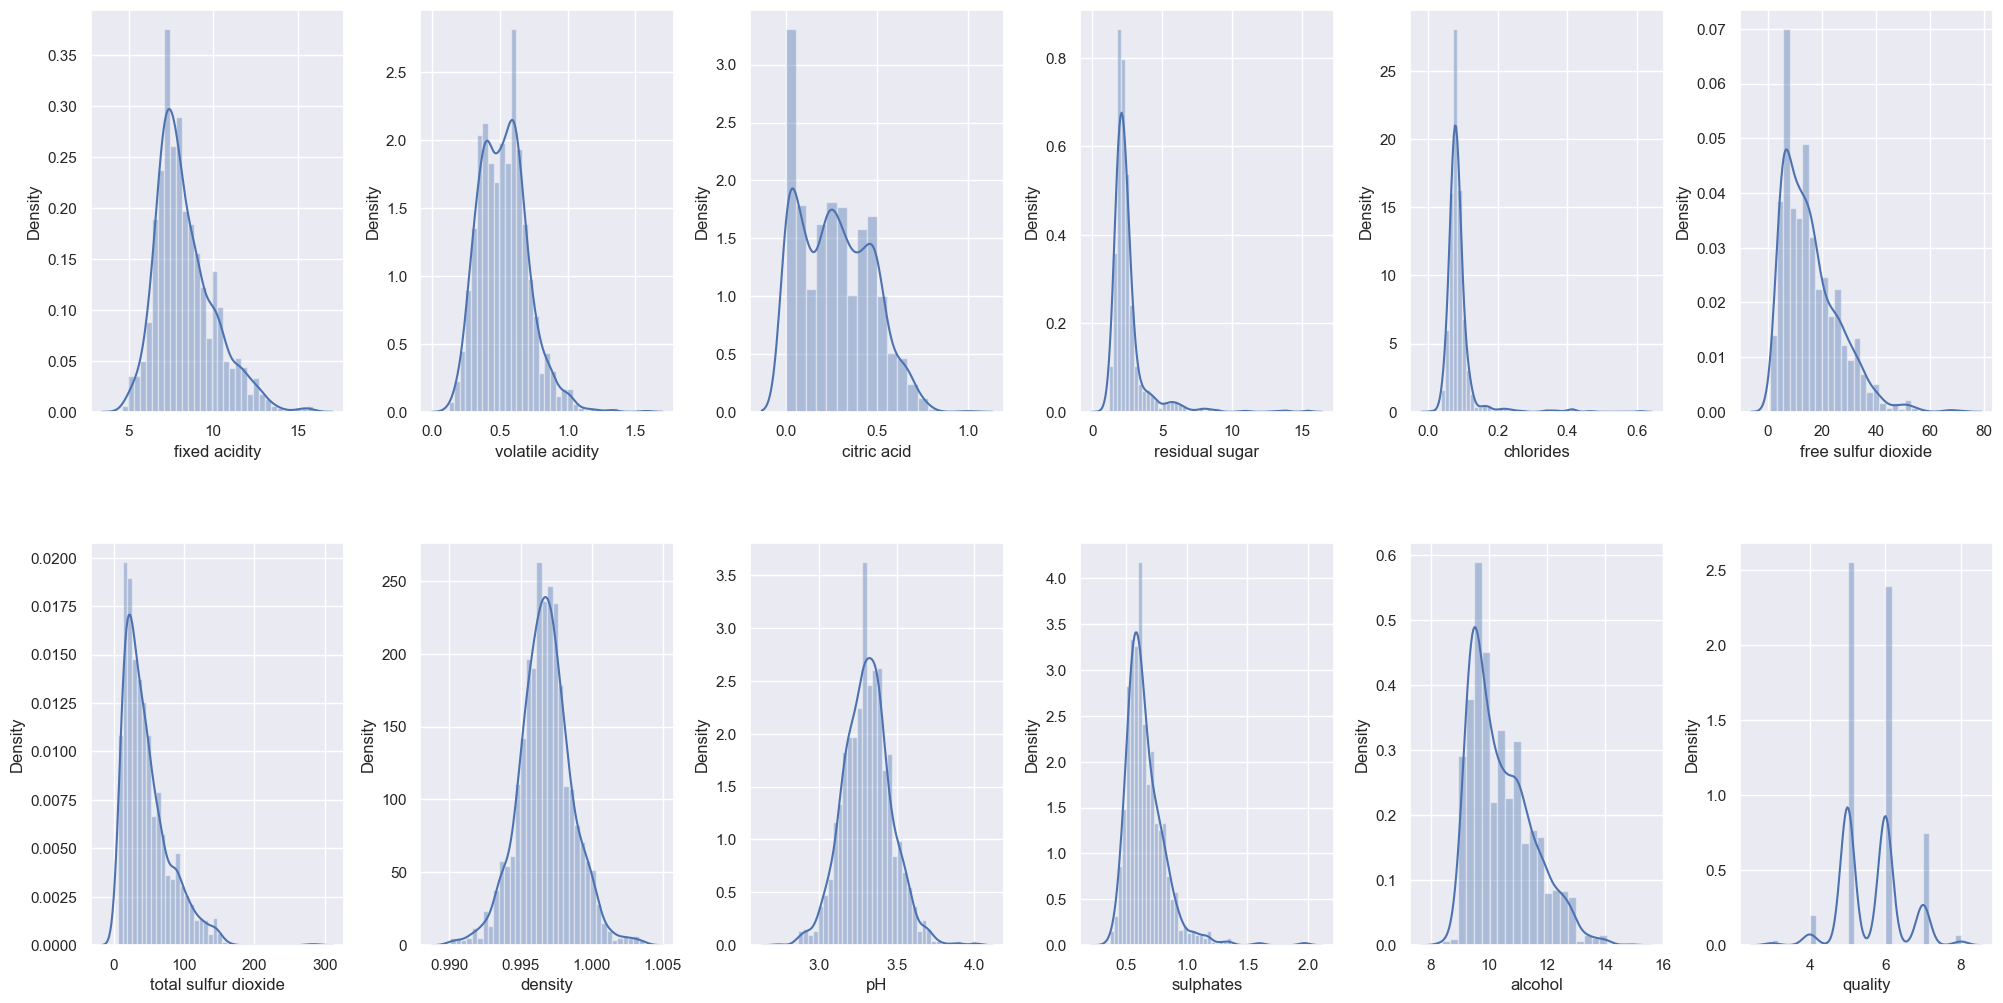

In [141]:
# create dist plot

fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in wine_data.items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index +=1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)





In [142]:
# correlation 
correlation = wine_data.corr()



<Axes: >

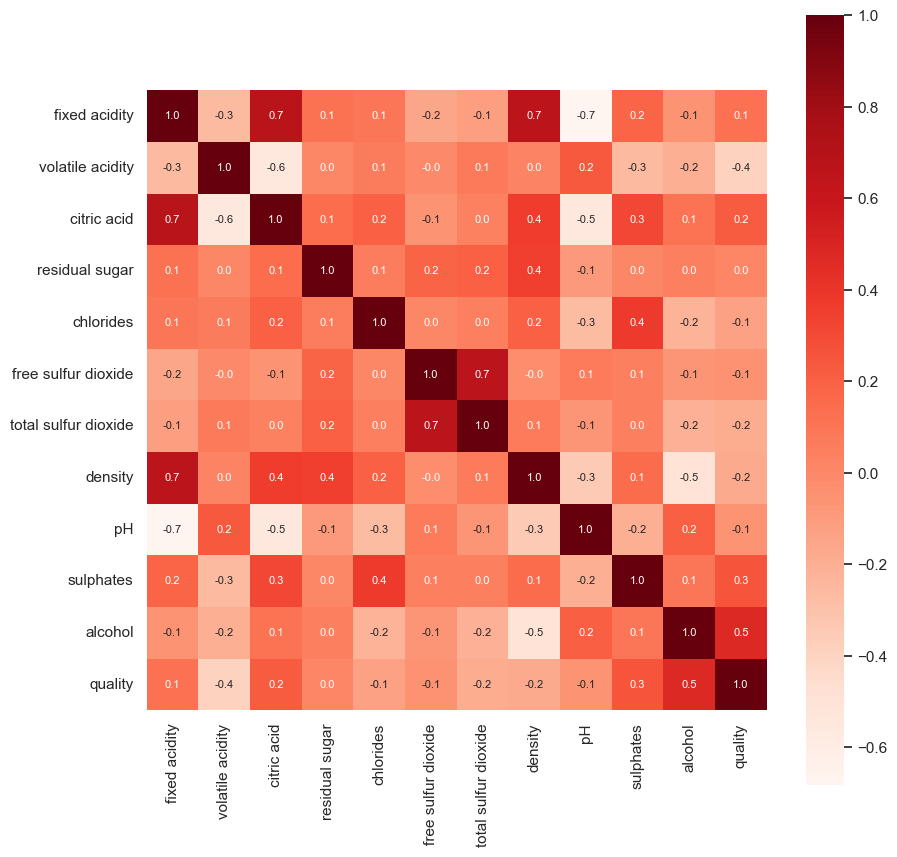

In [143]:
# heatmap to understand correlation between different parameters

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size': 8}, cmap = 'Reds')

In [144]:
# Detecting outliers through Z - score

from scipy import stats
z = np.abs(stats.zscore(wine_data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [145]:
# if value of z > 3 -> This is an outlier

print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [146]:
# remove those records where z score value is > 3


new_winedata = wine_data[(z < 3).all(axis=1)]

In [147]:
new_winedata.shape

(1451, 12)

# Feature Selection

In [148]:
# Classifying the data into good and bad alcohol quality

new_winedata['good'] = [1 if x >= 7 else 0 for x in new_winedata['quality']]

In [149]:
# Separating  feature variables and target variable

X = new_winedata.drop(['quality','good'], axis = 1)
Y = new_winedata['good']

In [150]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [151]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: good, Length: 1451, dtype: int64


In [152]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.0754844  0.09577928 0.09705455 0.08008777 0.06915088 0.06145847
 0.07766016 0.08656051 0.0684056  0.11377235 0.17458604]


# splitting the dataset in train and test models

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8830275229357798


# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for random forest:",accuracy_score(Y_test,Y_pred2))

Accuracy Score for random forest: 0.926605504587156


# SVC 

In [156]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for svc:",accuracy_score(Y_test,Y_pred3))

Accuracy Score for svc: 0.8692660550458715


# Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for DT:",accuracy_score(Y_test,Y_pred4))

Accuracy Score for DT: 0.9013761467889908


# Gaussian Naive Bayes

In [158]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train,Y_train)
Y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for gaussian NB:",accuracy_score(Y_test,Y_pred5))

Accuracy Score for gaussian NB: 0.8600917431192661


# XGBoost

In [159]:
import xgboost as xgb
model6 = xgb.XGBClassifier(random_state=1)
model6.fit(X_train, Y_train)
Y_pred6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for xgboost:",accuracy_score(Y_test,Y_pred6))

Accuracy Score for xgboost: 0.9311926605504587


In [161]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, auc

# Assuming X_test and y_test are defined and are your test datasets.
# Also assuming the models are already trained and stored in variables:
# logistic_regression_model, decision_tree_model, random_forest_model, knn_model, svm_model

models = {
    "Logistic Regression": model,
    "Random Forest": model2,
    "Support Vector Machine": model3,
    "Decision Tree": model4,
    "Gaussian Naive Bayes": model5,
    "XGboost": model6
}

evaluation_metrics = {}

for model_name, model in models.items():
# Predict probabilities (for ROC-AUC score) and classes
    Y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    Y_pred = model.predict(X_test)
    
# Calculate precision, recall, F1-score, and ROC-AUC
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    roc_auc = roc_auc_score(Y_test, Y_prob, multi_class='ovr', average='weighted')
    
    evaluation_metrics[model_name] = {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC Score": roc_auc
    }

# Display the evaluation metrics
import pandas as pd

metrics_df = pd.DataFrame(evaluation_metrics).transpose()
print(metrics_df)


                        Precision    Recall  F1 Score  ROC-AUC Score
Logistic Regression      0.865127  0.883028  0.868466       0.890571
Random Forest            0.922476  0.926606  0.923555       0.953108
Support Vector Machine   0.755623  0.869266  0.808471       0.835671
Decision Tree            0.910297  0.901376  0.904989       0.824029
Gaussian Naive Bayes     0.882719  0.860092  0.868980       0.874230
XGboost                  0.930218  0.931193  0.930669       0.942045


- Logistic Regression - This model has balanced precision and recall, with a decent ROC-AUC score 
indicating good overall performance.
- Random Forest  - This model shows very high performance across all metrics, with the highest ROC-AUC score
among all models, indicating excellent discrimination capability.
- Support Vector Machine - This model has lower precision but relatively high recall. The F1 score and ROC-AUC score are also lower compared to other models, suggesting it may not be the best choice for this dataset.
- Decision Tree - This model performs well in terms of precision, recall, and F1 score but has a lower ROC-AUC score, indicating it may not be as effective in distinguishing between classes compared to other models.
- Gaussian Naive Bayes - This model has good precision and recall, resulting in a decent F1 score and ROC-AUC score, showing balanced performance but slightly less effective than some other models.
- XGboost  - This model demonstrates excellent performance with high scores in all metrics, indicating it is highly effective for this dataset.

The Random Forest model is the best-performing model with an accuracy 
of 86%. It outperforms the other models, indicating it can generalize
well to unseen data by reducing overfitting and capturing complex 
patterns in the dataset.

# Problem No.2

# Medical Cost Personal Insurance Project

Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
	•	age: age of primary beneficiary
	•	sex: insurance contractor gender, female, male
	•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
	•	children: Number of children covered by health insurance / Number of dependents
	•	smoker: Smoking
	•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
	•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [73]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [59]:
# importing the red wine dataset

med_insurance = pd.read_csv("medical_cost_insurance.csv")

In [60]:
# first 5 rows of the dataset
med_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
# number of rows and column in the dataset
med_insurance.shape

(1338, 7)

In [62]:
# information on dataset
med_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features :
- sex
- smoker
- region

In [64]:
# checking for missing values 
med_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis :

In [65]:
# Statistical measures of the dataset 
med_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


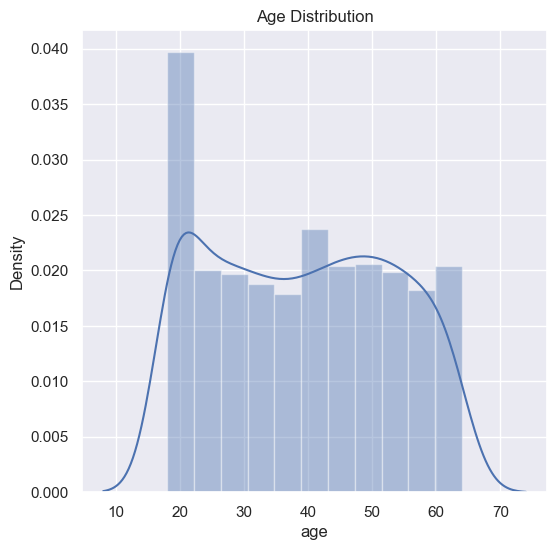

In [70]:
# distribution of age value

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(med_insurance['age'])
plt.title('Age Distribution')
plt.show()

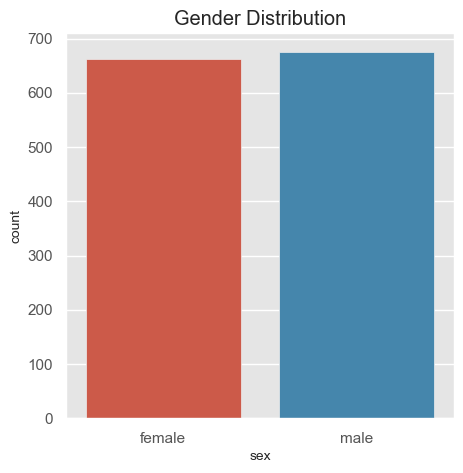

In [74]:
plt.figure(figsize = (5,5))
style.use('ggplot')
sns.countplot(x= 'sex', data = med_insurance)
plt.title('Gender Distribution')
plt.show()

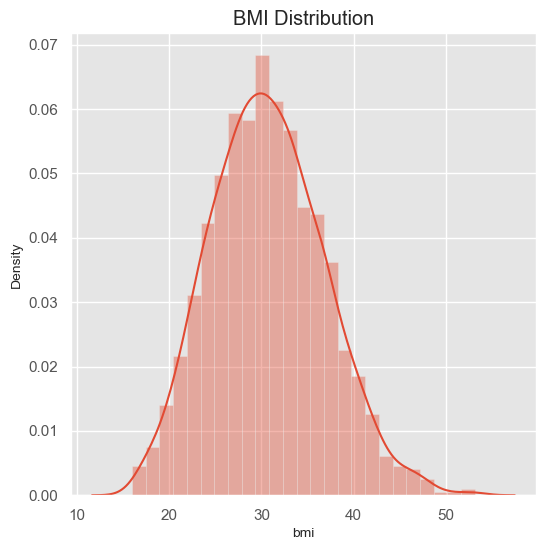

In [89]:
# bmi distribution 

plt.figure(figsize = (6,6))
sns.distplot(med_insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

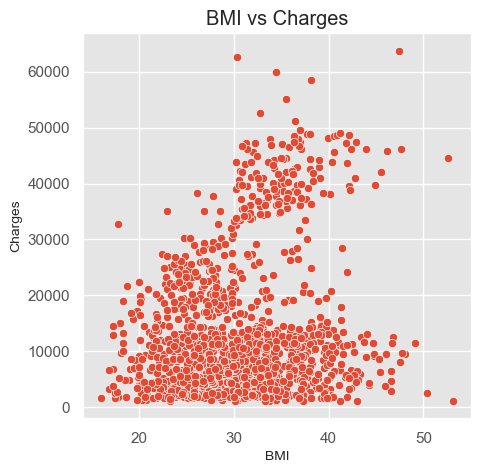

In [90]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='bmi', y='charges', data=med_insurance)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

 BMI has a normal distribution. 
 Normal BMI range  -> 18.5 to 24.9
 From the above bmi plot we can observe that most of the people are overweight and therefore this can increase their medical expense.

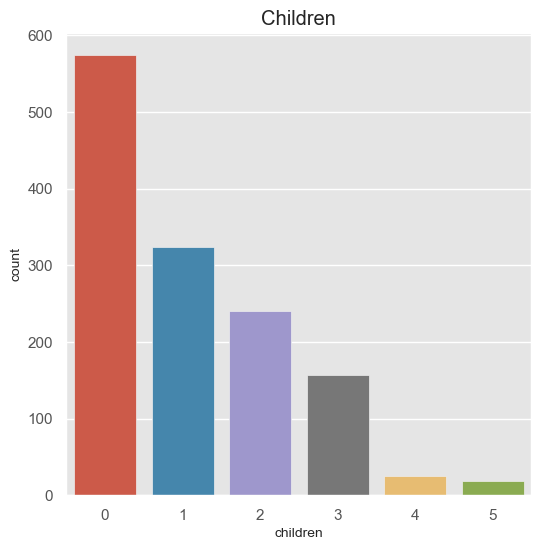

In [91]:
# number of children  

plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = med_insurance)
plt.title('Children')
plt.show()

In [92]:
# count of children

med_insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

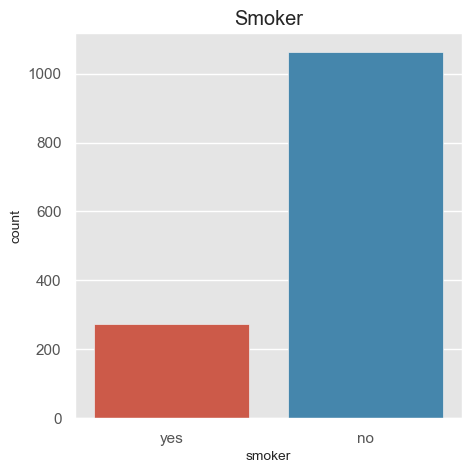

In [93]:
# smokers 
plt.figure(figsize = (5,5))
sns.countplot(x = 'smoker', data = med_insurance)
plt.title('Smoker')
plt.show()

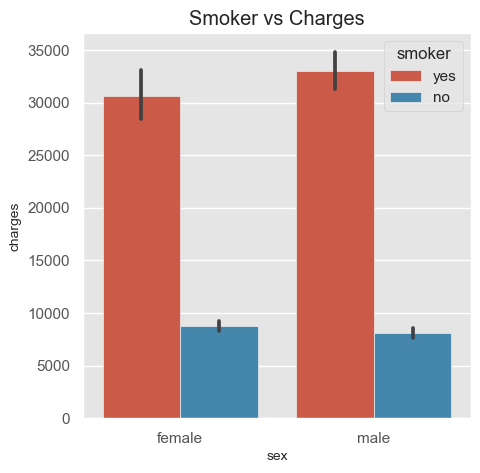

In [94]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'sex', y = 'charges', hue = 'smoker', data = med_insurance)
plt.title('Smoker vs Charges')
plt.show()

male smokers are slightly higher in number than female smokers 

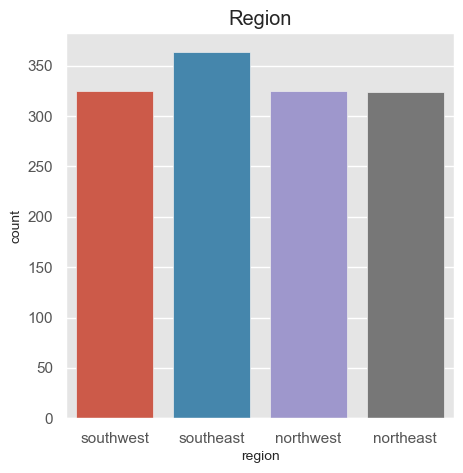

In [95]:
# Region distribution 
plt.figure(figsize = (5,5))
sns.countplot(x = 'region', data = med_insurance)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Region vs Charge')

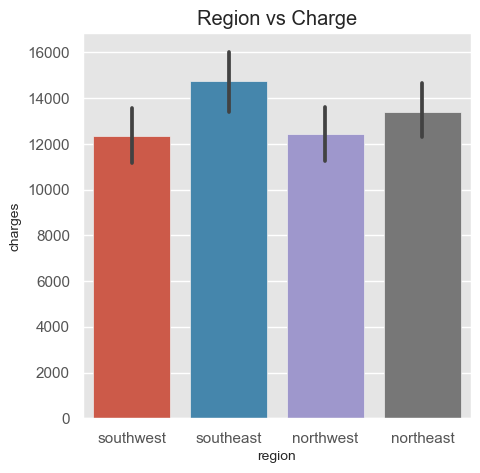

In [96]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'region',  y = 'charges', data = med_insurance)
plt.title('Region vs Charge')

In [98]:
# count of children

med_insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

medical charges for southeast region is a bit higher than other regions

# Categorical Features

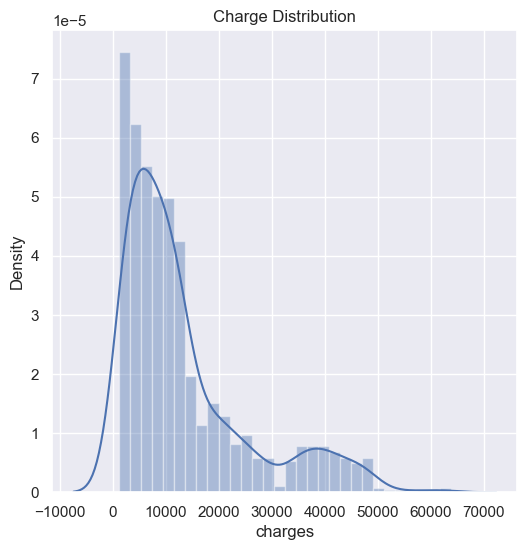

In [101]:
# distribution of charges value
plt.figure(figsize = (6,6))
sns.distplot(med_insurance['charges'])
plt.title('Charge Distribution')
plt.show()

# Data Preprocessing

encoding the categorical features

In [109]:

# Encoding 'sex' column
med_insurance.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)


# Encoding 'smoker' column
med_insurance.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)


# Encoding 'region' column
med_insurance.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest':3}}, inplace=True)

In [110]:
med_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting the features and targets 

In [111]:
X = med_insurance.drop(columns = 'charges', axis = 1)

Y = med_insurance['charges']

In [112]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [113]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into training and testing data

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [116]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training 

# Linear Regression

In [117]:
LR = LinearRegression()

In [118]:
LR.fit(X_train, Y_train)

LinearRegression()

In [119]:
pred = LR.predict(X_test)

In [121]:
from sklearn.metrics import r2_score
print('R2 score : ', (r2_score(Y_test, pred)))

R2 score :  0.7447273869684077


In [124]:
# randomly predict insurance cost for the given input

input_data = {'age': 35, 'sex': 1, 'bmi': 23, 'children': 0, 'smoker': 0, 'region': 3}
index = [0]
input_df = pd.DataFrame(input_data, index)
input_df

,age,sex,bmi,children,smoker,region
0,35,1,23,0,0,3


In [125]:
input_costpredict = LR.predict(input_df)

print('Medical Insurance Charges : ', input_costpredict)

Medical Insurance Charges :  [28424.4989987]


# Observation based on accuracy of the model

An R² score of 0.7447 indicates a relatively good fit, suggesting that
the model is able to capture a substantial amount of the variance in 
medical charges. However, there is still about 25.53% of the 
variability that is not explained by the model, which might be due 
to factors not included in the model or inherent randomness.